In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [50]:
data_movies=pd.read_csv('..\datasets\movies_dataset.csv',encoding='UTF-8',sep=',')
data_credits=pd.read_csv('..\datasets\credits.csv',encoding='UTF-8',sep=',')

C:\Users\oscar\AppData\Local\Temp\ipykernel_192\339866373.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data_movies=pd.read_csv('..\datasets\movies_dataset.csv',encoding='UTF-8',sep=',')


### Data Movies

In [51]:
data_movies.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [52]:
data_movies.info()
# 45 466 registros  y 24 columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [53]:
data_movies.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [54]:
data_movies["belongs_to_collection"].unique()

array(["{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}",
       nan,
       "{'id': 119050, 'name': 'Grumpy Old Men Collection', 'poster_path': '/nLvUdqgPgm3F85NMCii9gVFUcet.jpg', 'backdrop_path': '/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg'}",
       ...,
       "{'id': 148603, 'name': 'Ducobu Collection', 'poster_path': '/rd7AWZUy2QFPIblNWToVmdfXQcA.jpg', 'backdrop_path': '/7mzKmoIrvGapvsSbAVlX4HtCnFj.jpg'}",
       "{'id': 152918, 'name': 'Mister Blot Collection', 'poster_path': '/44PYEwwjGts8pAob59RHd6zlkKc.jpg', 'backdrop_path': '/5uoPsNiFpUYNamSGqE8okN27VRK.jpg'}",
       "{'id': 200641, 'name': 'Red Lotus Collection', 'poster_path': '/yf9Eod9ANXyHTzDpAxz9ezgvlL4.jpg', 'backdrop_path': '/3fhHbLeO3DqdHvgHg5szs399eBb.jpg'}"],
      dtype=object)

### Los valores nulos de los campos revenue, budget deben ser rellenados por el número 0.

In [55]:
data_movies['revenue'].isna().sum()

6

In [56]:
data_movies['revenue']=data_movies['revenue'].fillna(0)

In [57]:
data_movies['budget'].isna().sum()

0

In [58]:

data_movies['budget']=data_movies['budget'].fillna(0)
print(data_movies['budget'].isna().sum())

0


### Los valores nulos del campo release date deben eliminarse.

In [59]:
data_movies['release_date'].isna().sum()

87

In [60]:
#Borrado de nulos
data_movies = data_movies.dropna(subset=['release_date'])

### Campo fecha

In [61]:
data_movies['release_date'].isna().sum()

0

In [62]:
#import re
#regex = re.compile(r'^\d{4}-\d{2}-\d{2}$')
# Crear una columna booleana para marcar filas que cumplen con el formato de fecha
#data_movies['release_date'] = data_movies['release_date'].apply(lambda x: bool(regex.match(x)))

In [63]:
data_movies['release_date'].info()

<class 'pandas.core.series.Series'>
Index: 45379 entries, 0 to 45465
Series name: release_date
Non-Null Count  Dtype 
--------------  ----- 
45379 non-null  object
dtypes: object(1)
memory usage: 709.0+ KB


In [64]:
#Borrado de nulos
data_movies = data_movies.dropna(subset=['release_date'])

In [65]:
#data_movies['release_date'] = pd.to_datetime(data_movies['release_date'], format='mixed',errors='coerce') 
data_movies['release_date'] = pd.to_datetime(data_movies['release_date'], format='%Y-%m-%d',errors='coerce') 

#data_movies['release_date'] = pd.to_datetime(data_movies['release_date'],format='mixed', errors='coerce').dt.strftime('%Y-%m-%d')

In [66]:
#data_movies['release_date']=data_movies['release_date'].str.strip()

In [67]:
data_movies['release_date'].isna().sum()

3

In [68]:
data_movies = data_movies.dropna(subset=['release_date'])

### De haber fechas, deberán tener el formato AAAA-mm-dd, además deberán crear la columna release_year donde extraerán el año de la fecha de estreno.

In [69]:
#data_movies['mes'] = data_movies['release_date'].dt.month
data_movies['año'] = data_movies['release_date'].dt.year

### Crear la columna con el retorno de inversión, llamada return con los campos revenue y budget, dividiendo estas dos últimas revenue / budget, cuando no hay datos disponibles para calcularlo, deberá tomar el valor 0.

In [70]:
data_movies['revenue'].info()

<class 'pandas.core.series.Series'>
Index: 45376 entries, 0 to 45465
Series name: revenue
Non-Null Count  Dtype  
--------------  -----  
45376 non-null  float64
dtypes: float64(1)
memory usage: 709.0 KB


In [71]:
data_movies['budget'].info()
data_movies['budget']=data_movies['budget'].astype(float)
data_movies['budget'].info()

<class 'pandas.core.series.Series'>
Index: 45376 entries, 0 to 45465
Series name: budget
Non-Null Count  Dtype 
--------------  ----- 
45376 non-null  object
dtypes: object(1)
memory usage: 709.0+ KB
<class 'pandas.core.series.Series'>
Index: 45376 entries, 0 to 45465
Series name: budget
Non-Null Count  Dtype  
--------------  -----  
45376 non-null  float64
dtypes: float64(1)
memory usage: 709.0 KB


In [72]:
data_movies['return'] = (data_movies['revenue']/data_movies['budget'])

In [73]:
data_movies['return'].unique()
data_movies['return'].isna().sum()

34464

In [74]:
data_movies.info()


<class 'pandas.core.frame.DataFrame'>
Index: 45376 entries, 0 to 45465
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  45376 non-null  object        
 1   belongs_to_collection  4488 non-null   object        
 2   budget                 45376 non-null  float64       
 3   genres                 45376 non-null  object        
 4   homepage               7766 non-null   object        
 5   id                     45376 non-null  object        
 6   imdb_id                45362 non-null  object        
 7   original_language      45365 non-null  object        
 8   original_title         45376 non-null  object        
 9   overview               44435 non-null  object        
 10  popularity             45376 non-null  object        
 11  poster_path            45037 non-null  object        
 12  production_companies   45376 non-null  object        
 13  produc

### Desanidamiento de columnas

In [12]:
import pandas as pd
import json
import ast 
import numpy as np

In [76]:
data_movies['belongs_to_collection'] =data_movies['belongs_to_collection'].fillna('{}')

In [77]:
x=data_movies.loc[data_movies['belongs_to_collection']!='','belongs_to_collection'] 
print(len(x))
#4488

45376


In [78]:
#cambiar el tipo de dato
#data_movies['belongs_to_collection']=data_movies['belongs_to_collection'].apply(ast.literal_eval)
#df['collection'] = df['collection'].apply(ast.literal_eval)

In [79]:
def safe_eval(val):
    try:
        if val == '{}':
            return {}
        return ast.literal_eval(val)
    except (ValueError, SyntaxError):
        return {}

data_movies['belongs_to_collection'] = data_movies['belongs_to_collection'].apply(safe_eval)


In [80]:

# Expandir diccionarios en nuevas columnas
collection_df = pd.json_normalize(data_movies['belongs_to_collection'])


In [81]:
collection_df

,id,name,poster_path,backdrop_path
0,10194.0,Toy Story Collection,/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg,/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg
1,NaN,NaN,NaN,NaN
2,119050.0,Grumpy Old Men Collection,/nLvUdqgPgm3F85NMCii9gVFUcet.jpg,/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg
3,NaN,NaN,NaN,NaN
4,96871.0,Father of the Bride Collection,/nts4iOmNnq7GNicycMJ9pSAn204.jpg,/7qwE57OVZmMJChBpLEbJEmzUydk.jpg
...,...,...,...,...
45371,NaN,NaN,NaN,NaN
45372,NaN,NaN,NaN,NaN
45373,NaN,NaN,NaN,NaN
45374,NaN,NaN,NaN,NaN


In [82]:
#Combinar con el DataFrame original
df = data_movies.drop(columns=['belongs_to_collection']).join(collection_df, lsuffix='_orig', rsuffix='_collection')

In [83]:
collection_df.columns

Index(['id', 'name', 'poster_path', 'backdrop_path'], dtype='object')

In [84]:
df.columns

Index(['adult', 'budget', 'genres', 'homepage', 'id_orig', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path_orig', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'video', 'vote_average', 'vote_count', 'año',
       'return', 'id_collection', 'name', 'poster_path_collection',
       'backdrop_path'],
      dtype='object')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45376 entries, 0 to 45465
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   adult                   45376 non-null  object        
 1   budget                  45376 non-null  float64       
 2   genres                  45376 non-null  object        
 3   homepage                7766 non-null   object        
 4   id_orig                 45376 non-null  object        
 5   imdb_id                 45362 non-null  object        
 6   original_language       45365 non-null  object        
 7   original_title          45376 non-null  object        
 8   overview                44435 non-null  object        
 9   popularity              45376 non-null  object        
 10  poster_path_orig        45037 non-null  object        
 11  production_companies    45376 non-null  object        
 12  production_countries    45376 non-null  object     

In [86]:
df.isna().sum()

adult                         0
budget                        0
genres                        0
homepage                  37610
id_orig                       0
imdb_id                      14
original_language            11
original_title                0
overview                    941
popularity                    0
poster_path_orig            339
production_companies          0
production_countries          0
release_date                  0
revenue                       0
runtime                     246
spoken_languages              0
status                       80
tagline                   24978
title                         0
video                         0
vote_average                  0
vote_count                    0
año                           0
return                    34464
id_collection             40896
name                      40896
poster_path_collection    41438
backdrop_path             42122
dtype: int64

In [87]:
df.shape

(45376, 29)

In [88]:
print(df.dtypes)  # Mostrar tipos de datos originales

# Convertir la columna 'value' a float


adult                             object
budget                           float64
genres                            object
homepage                          object
id_orig                           object
imdb_id                           object
original_language                 object
original_title                    object
overview                          object
popularity                        object
poster_path_orig                  object
production_companies              object
production_countries              object
release_date              datetime64[ns]
revenue                          float64
runtime                          float64
spoken_languages                  object
status                            object
tagline                           object
title                             object
video                             object
vote_average                     float64
vote_count                       float64
año                                int32
return          

In [430]:
df['popularity'] = df['popularity'].astype(float)

In [108]:
df['id_orig'] = df['id_orig'].astype(int)

### Eliminar las columnas que no serán utilizadas, video,imdb_id,adult,original_title,poster_path y homepage.

In [90]:
df.columns

Index(['adult', 'budget', 'genres', 'homepage', 'id_orig', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path_orig', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'video', 'vote_average', 'vote_count', 'año',
       'return', 'id_collection', 'name', 'poster_path_collection',
       'backdrop_path'],
      dtype='object')

In [192]:
df['original_language'].unique()

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
       'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy',
       'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo',
       'ca', 'fi', 'th', 'sk', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
       'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
       'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
       'sq', nan, 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo', 'ay',
       'kn', 'eu', 'ne', 'pa', 'ky', 'gl', 'uz', 'sm', 'mt', 'hy', 'iu',
       'lb', 'si'], dtype=object)

In [193]:

movies=df.loc[:,['id_orig','original_language','original_title','popularity','release_date','vote_average','vote_count','año','return']]

In [194]:
movies['original_title'].duplicated().sum()
#movies.loc[movies['original_title'].duplicated()]
movies = movies.drop_duplicates(subset=['original_title'])

In [195]:
#checar duplicados en movies
#print(movies.duplicated().sum())
movies['id_orig'].duplicated().sum()
movies.loc[movies['id_orig'].duplicated()]

movies.loc[movies['id_orig']==5511]

,id_orig,original_language,original_title,popularity,release_date,vote_average,vote_count,año,return
7345,5511,fr,Le Samouraï,9.091288,1967-10-25,7.9,187.0,1967,inf


In [196]:
movies = movies.drop_duplicates(subset=['id_orig'])

In [197]:
movies['id_orig'].duplicated().sum()

0

In [201]:
movies=movies.loc[movies['original_language']=='en'] 

In [203]:
movies.shape
#registros limpiando duplicados por id 45 346
#registros limpiando duplicados por titulo original 43 288

(30357, 9)

In [204]:
movies.to_csv('movies_limpio.csv', index=False)

In [101]:
#nulos
null_counts = movies.isna().sum()
print(null_counts)

id_orig               0
original_title        0
popularity            0
release_date          0
vote_average          0
vote_count            0
año                   0
return            34464
dtype: int64


(array([ 2961.,   192.,   528.,  1612.,  4536., 11325., 14636.,  7700.,
         1496.,   390.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

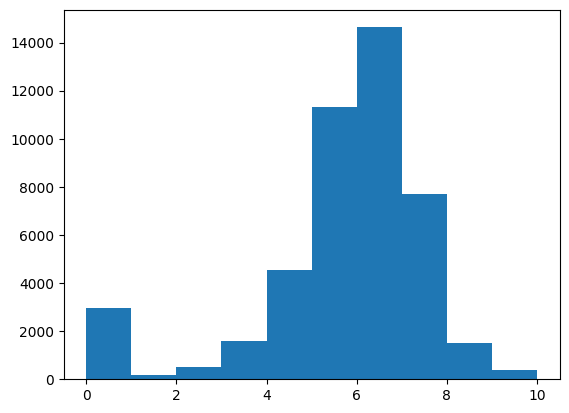

In [434]:
import matplotlib.pyplot as plt
plt.hist(df.vote_average)

### Checar duplicados

In [42]:

print(df.duplicated().sum()) 

12


(array([3.9869e+04, 1.7680e+03, 3.6700e+02, 1.3700e+02, 2.7000e+01,
        1.9000e+01, 4.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 10 artists>)

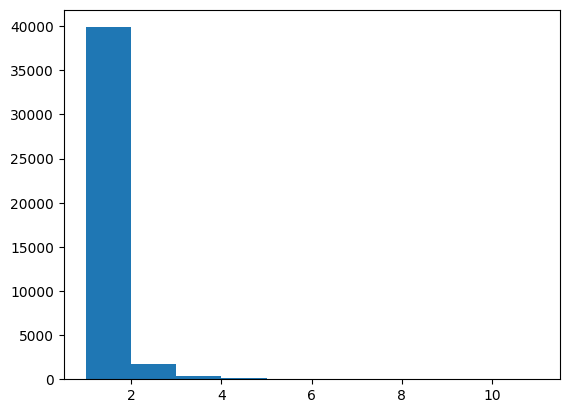

In [48]:
df.groupby(['popularity'])['id_orig'].count()   
plt.hist(df.groupby(['title'])['title'].count())

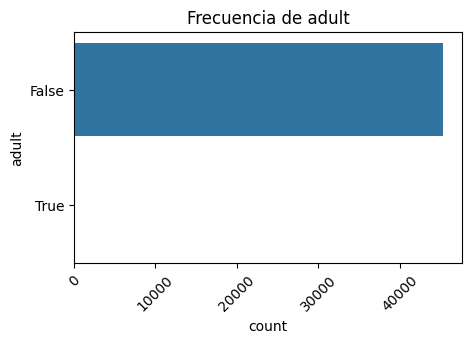

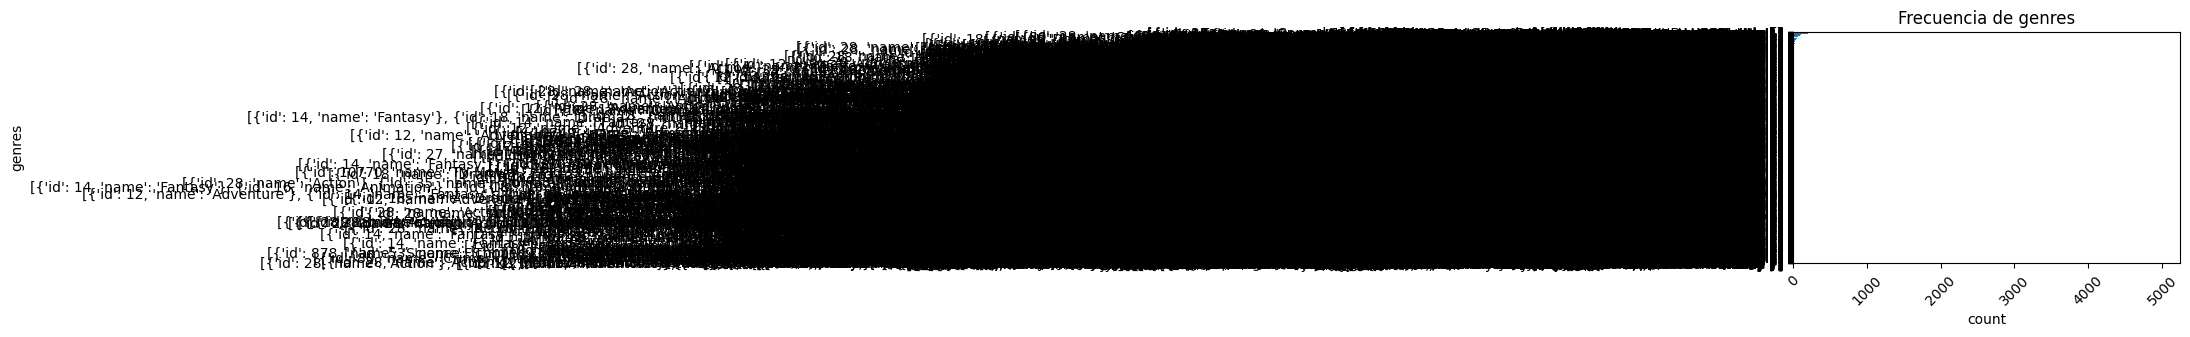

d:\HOME\CURSOS\HENRY\1_MODULO\2_CARACTERISTICAS_DE_LOS_DATOS\TAREA\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54801 (\N{HANGUL SYLLABLE HYEOB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\HOME\CURSOS\HENRY\1_MODULO\2_CARACTERISTICAS_DE_LOS_DATOS\TAREA\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45376 (\N{HANGUL SYLLABLE NYEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


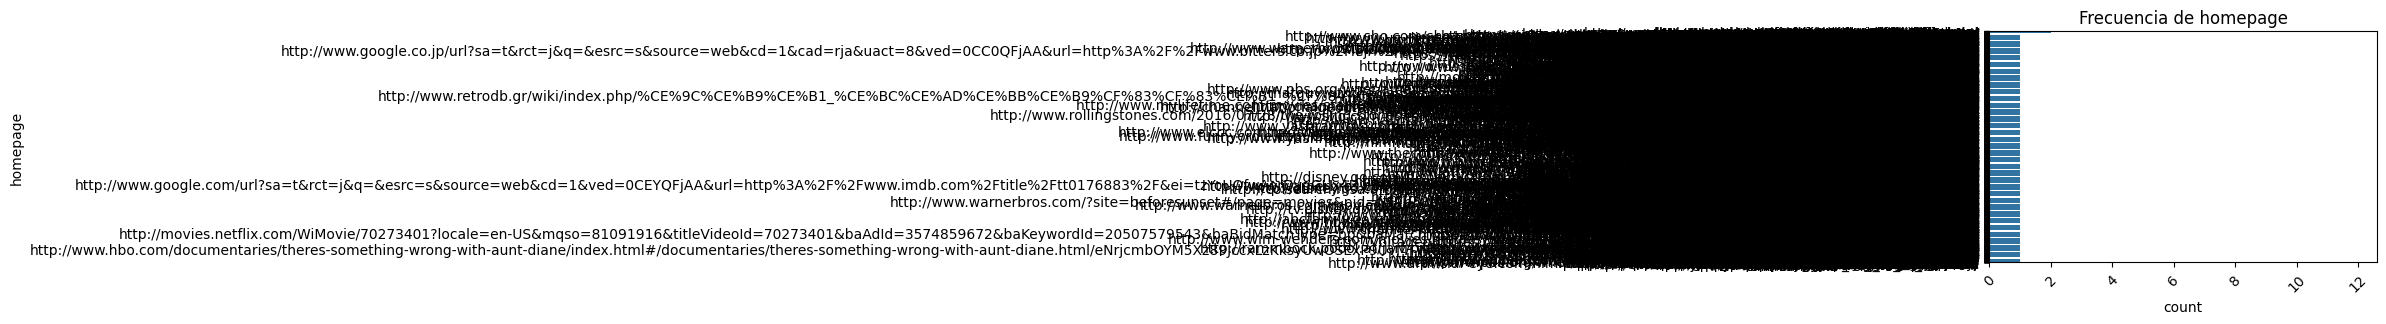

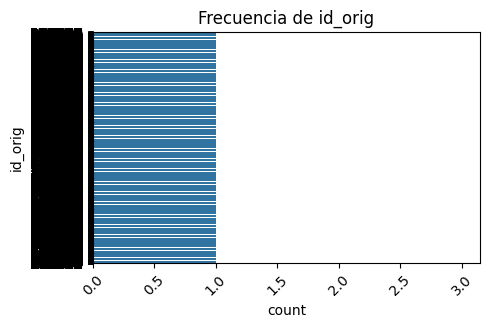

KeyboardInterrupt: 

In [436]:
# Gráficos de barras de variables categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(5, 3))
    sns.countplot(df[col], order=df[col].value_counts().index)
    plt.title(f'Frecuencia de {col}')
    plt.xticks(rotation=45)
    plt.show()

In [257]:
# def expandircolumnas(df, columns):
#     for column in columns:
#         df[column] = df[column].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])
#         # Expandir la columna en filas
#         df = df.explode(column)
#         # Normalizar la columna expandida
#         col_df = pd.json_normalize(df[column])
#         # Renombrar las columnas normalizadas para evitar superposiciones
#         col_df = col_df.add_prefix(f'{column}')
#         # Concatenar las columnas normalizadas con el DataFrame original
#         df = df.drop(columns=[column]).reset_index(drop=True).join(col_df)
#     return df

# columns_to_expand = ['genres', 'production_companies', 'production_countries', 'spoken_languages']

In [ ]:
expandircolumnas(data_movies,columns_to_expand)

In [255]:
def extract_id(value):
    if pd.isnull(value):
        return np.nan
    try:
        collection_dict = ast.literal_eval(value)
        if isinstance(collection_dict, dict) and 'id' in collection_dict:
            return collection_dict['id']
        else:
            return np.nan
    except (ValueError, SyntaxError):
        return np.nan

# Aplicar la función a la columna belongs_to_collection


In [253]:
df_pandas_copy=data_movies.copy

In [256]:
df_pandas_copy['belongs_to_collection'] = df_pandas_copy['belongs_to_collection'].apply(extract_id)

TypeError: 'method' object is not subscriptable

In [267]:
# Desanidar usando json_normalize
#collection_df = pd.json_normalize(data_movies['belongs_to_collection'])
collection_df = data_movies['belongs_to_collection'].apply(pd.Series)
#data_movies = data_movies.join(collection_df)
#data_movies = data_movies.drop(columns=['belongs_to_collection']).join(collection_df)

In [268]:
collection_df

,id,name,poster_path,backdrop_path
0,10194.0,Toy Story Collection,/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg,/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg
1,NaN,NaN,NaN,NaN
2,119050.0,Grumpy Old Men Collection,/nLvUdqgPgm3F85NMCii9gVFUcet.jpg,/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg
3,NaN,NaN,NaN,NaN
4,96871.0,Father of the Bride Collection,/nts4iOmNnq7GNicycMJ9pSAn204.jpg,/7qwE57OVZmMJChBpLEbJEmzUydk.jpg
...,...,...,...,...
45460,NaN,NaN,NaN,NaN
45462,NaN,NaN,NaN,NaN
45463,NaN,NaN,NaN,NaN
45464,NaN,NaN,NaN,NaN


In [269]:
data_movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'año', 'return'],
      dtype='object')

In [270]:
data_movies = data_movies.join(collection_df)

ValueError: columns overlap but no suffix specified: Index(['id', 'poster_path'], dtype='object')

In [188]:
data_movies.head(3)

,adult,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,año,return
0,False,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995,12.451801
1,False,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995,4.043035
2,False,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995,NaN


# archivo creditos

In [13]:
data_credits=pd.read_csv('..\datasets\credits.csv',encoding='UTF-8',sep=',')

In [14]:
data_credits.head(1)
data_credits.shape

(45476, 3)

In [15]:
data_credits.duplicated().sum()
data_credits=data_credits.drop_duplicates()

In [16]:
# checar nulos
data_credits.isna().sum()

cast    0
crew    0
id      0
dtype: int64

In [17]:
# Convertir las cadenas de texto a listas de diccionarios
data_credits['cast'] = data_credits['cast'].apply(ast.literal_eval)
# Convertir los diccionarios en columnas y añadir un prefijo
#df_actores = df_exploded['actores'].apply(pd.Series).add_prefix('actor_')

In [18]:
# 1 Convertir la columna de texto a una lista de diccionarios
data_credits['crew'] = data_credits['crew'].apply(ast.literal_eval)


In [19]:
# 2 Expandir la lista de diccionarios en nuevas columnas
df_expanded = data_credits['cast'].apply(pd.Series).stack().reset_index(level=1, drop=True).apply(pd.Series)


In [20]:
df_expanded.head(1)

,cast_id,character,credit_id,gender,id,name,order,profile_path
0,14,Woody (voice),52fe4284c3a36847f8024f95,2,31,Tom Hanks,0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg


In [21]:
actores_expanded=df_expanded.copy()

In [22]:
#3 Agregar un prefijo a las nuevas columnas
actores_expanded = actores_expanded.add_prefix('cast_')
actores_expanded.head(1)

,cast_cast_id,cast_character,cast_credit_id,cast_gender,cast_id,cast_name,cast_order,cast_profile_path
0,14,Woody (voice),52fe4284c3a36847f8024f95,2,31,Tom Hanks,0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg


In [23]:
# Renombrar la columna 'cast_cast_id' a 'nombre_completo'
actores_expanded = actores_expanded.rename(columns={'cast_cast_id': 'actor_id'})
actores_expanded.head(1)

,actor_id,cast_character,cast_credit_id,cast_gender,cast_id,cast_name,cast_order,cast_profile_path
0,14,Woody (voice),52fe4284c3a36847f8024f95,2,31,Tom Hanks,0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg


In [24]:
# 4 Combinar el DataFrame original con el DataFrame expandido
df_final = data_credits.drop(columns=['cast']).join(actores_expanded)
df_final = df_final.drop(columns=['crew'])


In [25]:
df_final.head(1)
df_final.shape
# 564 546  registros, con  9 columnas

(564546, 9)

In [26]:
df_final.head(10)

,id,actor_id,cast_character,cast_credit_id,cast_gender,cast_id,cast_name,cast_order,cast_profile_path
0,862,14.0,Woody (voice),52fe4284c3a36847f8024f95,2.0,31.0,Tom Hanks,0.0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg
0,862,15.0,Buzz Lightyear (voice),52fe4284c3a36847f8024f99,2.0,12898.0,Tim Allen,1.0,/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg
0,862,16.0,Mr. Potato Head (voice),52fe4284c3a36847f8024f9d,2.0,7167.0,Don Rickles,2.0,/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg
0,862,17.0,Slinky Dog (voice),52fe4284c3a36847f8024fa1,2.0,12899.0,Jim Varney,3.0,/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg
0,862,18.0,Rex (voice),52fe4284c3a36847f8024fa5,2.0,12900.0,Wallace Shawn,4.0,/oGE6JqPP2xH4tNORKNqxbNPYi7u.jpg
0,862,19.0,Hamm (voice),52fe4284c3a36847f8024fa9,2.0,7907.0,John Ratzenberger,5.0,/yGechiKWL6TJDfVE2KPSJYqdMsY.jpg
0,862,20.0,Bo Peep (voice),52fe4284c3a36847f8024fad,1.0,8873.0,Annie Potts,6.0,/eryXT84RL41jHSJcMy4kS3u9y6w.jpg
0,862,26.0,Andy (voice),52fe4284c3a36847f8024fc1,0.0,1116442.0,John Morris,7.0,/vYGyvK4LzeaUCoNSHtsuqJUY15M.jpg
0,862,22.0,Sid (voice),52fe4284c3a36847f8024fb1,2.0,12901.0,Erik von Detten,8.0,/twnF1ZaJ1FUNUuo6xLXwcxjayBE.jpg
0,862,23.0,Mrs. Davis (voice),52fe4284c3a36847f8024fb5,1.0,12133.0,Laurie Metcalf,9.0,/unMMIT60eoBM2sN2nyR7EZ2BvvD.jpg


In [27]:
# 2 Expandir la lista de diccionarios en nuevas columnas
df_expanded_crew = data_credits['crew'].apply(pd.Series).stack().reset_index(level=1, drop=True).apply(pd.Series)

In [28]:
directores_expanded=df_expanded_crew.copy()

In [29]:
#3 Agregar un prefijo a las nuevas columnas
directores_expanded = directores_expanded.add_prefix('crew_')
directores_expanded.head(1)

,crew_credit_id,crew_department,crew_gender,crew_id,crew_job,crew_name,crew_profile_path
0,52fe4284c3a36847f8024f49,Directing,2,7879,Director,John Lasseter,/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg


In [30]:
data_credits.head(1)
aux=data_credits.copy() 


In [31]:
aux=aux.drop(columns=['cast'])

In [32]:
aux.shape

(45439, 2)

In [33]:
aux.head(1)

,crew,id
0,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862


In [34]:
# 4 Combinar el DataFrame original con el DataFrame expandido
df_final_crew = aux.drop(columns=['crew']).join(directores_expanded)


In [35]:
df_final_crew.shape
# 464698 observaciones, 8 columnas

(464698, 8)

In [36]:
df_final_crew.head(3)

,id,crew_credit_id,crew_department,crew_gender,crew_id,crew_job,crew_name,crew_profile_path
0,862,52fe4284c3a36847f8024f49,Directing,2.0,7879.0,Director,John Lasseter,/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg
0,862,52fe4284c3a36847f8024f4f,Writing,2.0,12891.0,Screenplay,Joss Whedon,/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg
0,862,52fe4284c3a36847f8024f55,Writing,2.0,7.0,Screenplay,Andrew Stanton,/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg


# Actores

In [37]:
#actores
df_final.head(10)

df_actores_final=df_final.loc[:,['id','actor_id','cast_name','cast_order']]

In [38]:
df_actores_final.head(10)

,id,actor_id,cast_name,cast_order
0,862,14.0,Tom Hanks,0.0
0,862,15.0,Tim Allen,1.0
0,862,16.0,Don Rickles,2.0
0,862,17.0,Jim Varney,3.0
0,862,18.0,Wallace Shawn,4.0
0,862,19.0,John Ratzenberger,5.0
0,862,20.0,Annie Potts,6.0
0,862,26.0,John Morris,7.0
0,862,22.0,Erik von Detten,8.0
0,862,23.0,Laurie Metcalf,9.0


In [44]:
df_actores_final.shape


(564546, 4)

In [40]:
import re
# Definir una expresión regular que incluye caracteres en español
regex_espanol = re.compile(r'^[a-zA-ZáéíóúÁÉÍÓÚñÑüÜ0-9\s]+$')

# Función para verificar si una cadena cumple con la expresión regular
def es_texto_espanol(cadena):
    if isinstance(cadena, str):
        return bool(regex_espanol.match(cadena))
    return False
# Función para verificar si una cadena cumple con la expresión regular
#def es_texto_espanol(cadena):
#    return bool(regex_espanol.match(cadena))

# Aplicar la función a la columna de nombres de películas
df_filtrado = df_actores_final[df_actores_final['cast_name'].apply(es_texto_espanol)]

In [41]:
df_filtrado.shape

(514860, 4)

In [42]:
from langdetect import detect

In [43]:
def detectar_idioma(texto):
    try:
        return detect(texto)
    except:
        return 'desconocido'

In [45]:
# Aplicar la función a la columna de descripciones
df_filtrado['idioma'] = df_filtrado['cast_name'].apply(detectar_idioma)

In [ ]:
df_actores_final['idioma'].unique()

In [234]:
df_actores_final.to_csv('actores_limpio.csv', index=False)

# Directores

In [ ]:
df_final_crew

In [240]:
#directores
df_final_crew.head(10)

df_directores_final=df_final_crew.loc[:,['id','crew_department','crew_id','crew_job','crew_name']]

In [241]:
df_final_crew.head(10)

,id,crew_credit_id,crew_department,crew_gender,crew_id,crew_job,crew_name,crew_profile_path
0,862,52fe4284c3a36847f8024f49,Directing,2.0,7879.0,Director,John Lasseter,/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg
0,862,52fe4284c3a36847f8024f4f,Writing,2.0,12891.0,Screenplay,Joss Whedon,/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg
0,862,52fe4284c3a36847f8024f55,Writing,2.0,7.0,Screenplay,Andrew Stanton,/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg
0,862,52fe4284c3a36847f8024f5b,Writing,2.0,12892.0,Screenplay,Joel Cohen,/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg
0,862,52fe4284c3a36847f8024f61,Writing,0.0,12893.0,Screenplay,Alec Sokolow,/v79vlRYi94BZUQnkkyznbGUZLjT.jpg
0,862,52fe4284c3a36847f8024f67,Production,1.0,12894.0,Producer,Bonnie Arnold,None
0,862,52fe4284c3a36847f8024f6d,Production,0.0,12895.0,Executive Producer,Ed Catmull,None
0,862,52fe4284c3a36847f8024f73,Production,2.0,12896.0,Producer,Ralph Guggenheim,None
0,862,52fe4284c3a36847f8024f79,Production,2.0,12897.0,Executive Producer,Steve Jobs,/mOMP3SwD5qWQSR0ldCIByd3guTV.jpg
0,862,52fe4284c3a36847f8024f8b,Editing,2.0,8.0,Editor,Lee Unkrich,/bdTCCXjgOV3YyaNmLGYGOxFQMOc.jpg


In [242]:
df_directores_final.head(10)

,id,crew_department,crew_id,crew_job,crew_name
0,862,Directing,7879.0,Director,John Lasseter
0,862,Writing,12891.0,Screenplay,Joss Whedon
0,862,Writing,7.0,Screenplay,Andrew Stanton
0,862,Writing,12892.0,Screenplay,Joel Cohen
0,862,Writing,12893.0,Screenplay,Alec Sokolow
0,862,Production,12894.0,Producer,Bonnie Arnold
0,862,Production,12895.0,Executive Producer,Ed Catmull
0,862,Production,12896.0,Producer,Ralph Guggenheim
0,862,Production,12897.0,Executive Producer,Steve Jobs
0,862,Editing,8.0,Editor,Lee Unkrich


In [243]:
df_directores_final.to_csv('directores_limpio.csv', index=False)